In [156]:
%reset
import numpy as np
from scipy import stats
from scipy import optimize

N1 = 1.0
N2 = 1.0
N3 = 1.0
chi12 = 2.0
chi13 = 2.90
chi23 = 3.0

chi1 = 0.5*(chi12 + chi13 - chi23)
chi2 = 0.5*(chi12 + chi23 - chi13)
chi3 = 0.5*(chi13 + chi23 - chi12)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [157]:
def equations(p):
    phi1, phi2 = p
    phi3 = 1. - phi1 - phi2
    
#     psi1 = N1 * phi1 / (1. - 2. * chi1 * N1 * phi1)
#     psi2 = N2 * phi2 / (1. - 2. * chi2 * N2 * phi2)
#     psi3 = N3 * phi3 / (1. - 2. * chi3 * N3 * phi3)

   
    f1 = phi1*(1.-2.*chi2*phi2)*(1.-2.*chi3*phi3) +\
         phi2*(1.-2.*chi1*phi1)*(1.-2.*chi3*phi3) +\
         N3*phi3*(1.-2.*chi1*phi1)*(1.-2.*chi2*phi2)
    f2 = phi1*(1.-2.*chi2*phi2)**3.*(1.-2.*chi3*phi3)**3. +\
         phi2*(1.-2.*chi1*phi1)**3.*(1.-2.*chi3*phi3)**3. +\
         N3*phi3*(1.-2.*chi1*phi1)**3.*(1.-2.*chi2*phi2)**3.
    
    return (f1,f2)

def f(p):
    return abs(sum(np.array(equations(p))**2)-0)

PLEASE NOTE: FSOLVE FINDS THE CLOSEST ROOT TO THE FIRST GUESS

GRID IS DEFINED TO SEARCH ALL 4 REGIONS CLOSE TO THE ROOTS

ONE WAY TO FIND ALL THE ROOTS, IF YOU HAD NO IDEA ABOUT THE FIRST GUESS, IS

TO MESH THE SYSTEM, LIKE THE WAY BALAJI DID, AND SEARCH ALL THE REGIONS

In [158]:
x_dim = np.arange(0.023, 0.99, 0.1)
y_dim = x_dim

#3D Grid
# z_dim = x_dim
# grid = np.zeros((len(x_dim)*len(y_dim)*len(z_dim), 3))

# m = 0
# for i in range(len(x_dim)):
#     for j in range(len(y_dim)):
#         for k in range(len(z_dim)):
#             grid[m,:] = x_dim[i], y_dim[j], z_dim[k]
#             m+=1

###2D Grid
grid = np.zeros((len(x_dim)*len(y_dim), 2))

m = 0
for i in range(len(x_dim)):
    for j in range(len(y_dim)):
        grid[m,:] = x_dim[i], y_dim[j]
        m+=1

Following will solve the equations with fsolve function

In [159]:
roots =[]
from tqdm.notebook import tqdm
for i in tqdm(range(len(grid))):
    initial_guess = optimize.fmin(f, (grid[i]))
    pr = optimize.fsolve(equations, initial_guess)
    if (np.abs(equations(pr))<1e-11).all():
        roots.append(pr)
roots = np.array(roots)
roots = roots[((roots[:,0]>=0.0) & (roots[:,0]<=1.0) & (roots[:,1]>=0.0) & (roots[:,1]<=1.0))]

Optimization terminated successfully.
         Current function value: 0.547033
         Iterations: 21
         Function evaluations: 38
Optimization terminated successfully.
         Current function value: 0.547033
         Iterations: 33
         Function evaluations: 64
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 110
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 183
         Function evaluations: 336
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 163
         Function evaluations: 295
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 170
         Function evaluations: 321
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 143
         Function evaluations: 260
Optimization terminated 

Let's solve it with nsolve function

In [160]:
print("(phi1, phi2, phi3):", (roots[0,0], roots[0,1], 1.-sum(roots[0])))

(phi1, phi2, phi3): (0.2672703090551857, 0.4763720812677514, 0.256357609677063)


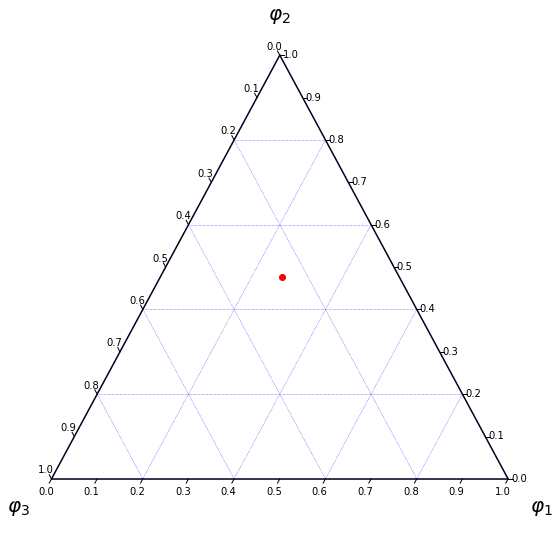

In [161]:
import ternary

fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(9, 9)

## Shuffle points for additional plot

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.right_corner_label("$\\varphi_1$", fontsize=20)
tax.top_corner_label("$\\varphi_2$", fontsize=20)
tax.left_corner_label("$\\varphi_3$", fontsize=20)
tax.gridlines(multiple=0.2, color="blue")
tax.scatter([(roots[0,0], roots[0,1] ,1.-sum(roots[0]))], marker='o', color='red', label="Critical Point")

tax.show()
